# <font color='green'>Import</font> Libraries

In [130]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob 
from tweepy import API
from tweepy import Cursor
from tweepy import OAuthHandler
import json
import datetime
import re
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

# <font color='red'>Store</font> API Keys 

In [131]:
df = pd.read_csv('API_SET1.csv')

In [132]:
TwitterApiKey=df["Twitter_Api_Key"][0]
TwitterApiSecret=df["Twitter_Api_Secret_Key"][0]
TwitterApiAccessToken=df["Twitter_Api_access_token"][0]
TwitterApiSecretToken=df["Twitter_Api_secret_access_token"][0]

In [133]:
auth=tweepy.OAuthHandler(TwitterApiKey,TwitterApiSecret)
auth.set_access_token(TwitterApiAccessToken,TwitterApiSecretToken)
twitterApi=tweepy.API(auth,wait_on_rate_limit=True)

C:\Users\aadit\anaconda3\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


# <font color='blue'>Selection</font> of Twitter Account

In [134]:
twitterAccount = "@CobraTateKING"

In [135]:
tweets=tweepy.Cursor(twitterApi.user_timeline,
                    screen_name=twitterAccount,
                    count=None,
                    since_id=None,
                    max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,
                    include_entities=False).items(50);

# <font color='red'>Converted</font> Tweets into DataFrame

In [136]:
df=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=["Tweets"])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [137]:
df.head(10)

,Tweets
0,Life’s simple. You make choices and you don’t ...
1,Life is Beautiful outside the Matrix.\n\nhttps...
2,Brotherhood is our most precious possession. h...
3,"As soon as you are granted life,\n\nYou are gu..."
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z
5,Put yourself on as many grids as possible. htt...
6,Seeds of doubt grow into forests of inaction. ...
7,RT @Talismanthetate: Best idea. https://t.co/O...
8,A man without a vision for his future always r...
9,I only know how to win. \n\nI’ve never tried l...


# Text Cleaning

In [138]:
def cleanupTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT :','',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [139]:
df.head(10)

,Tweets
0,Life’s simple. You make choices and you don’t ...
1,Life is Beautiful outside the Matrix.\n\nhttps...
2,Brotherhood is our most precious possession. h...
3,"As soon as you are granted life,\n\nYou are gu..."
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z
5,Put yourself on as many grids as possible. htt...
6,Seeds of doubt grow into forests of inaction. ...
7,RT @Talismanthetate: Best idea. https://t.co/O...
8,A man without a vision for his future always r...
9,I only know how to win. \n\nI’ve never tried l...


In [140]:
df['Tweet'] = df['Tweets'].apply(cleanupTweet)

In [141]:
df.head()

,Tweets,Tweet
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu..."
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.


# Text Subjectivity

In [142]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Text Polarity

In [143]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

# Cleaned Tweets 

In [144]:
df['Subjectivity'] = df['Tweets'].apply(getTextSubjectivity)

In [145]:
df['Polarity'] = df['Tweets'].apply(getTextPolarity)

In [146]:
df.head()

,Tweets,Tweet,Subjectivity,Polarity
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,0.000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,0.425
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,0.500
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,0.000
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,-0.400


# Sentiment Intensity Analyzer

In [147]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [148]:
df['Polarity'] = df['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet))
df.head()

,Tweets,Tweet,Subjectivity,Polarity
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp..."
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co..."
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp..."


In [149]:
df['Compound'] = df['Polarity'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767


In [150]:
df['comp_score'] = df['Compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,pos
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115,pos
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023,neg
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767,neg


In [151]:
df['neg_score'] = df['Polarity'].apply(lambda score_dict: score_dict['neg'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,pos,0.000
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115,pos,0.000
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023,neg,0.144
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767,neg,0.437


In [152]:
df['pos_score'] = df['Polarity'].apply(lambda score_dict: score_dict['pos'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,pos,0.000,0.438
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115,pos,0.000,0.444
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023,neg,0.144,0.152
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767,neg,0.437,0.000


In [153]:
df['neu_score'] = df['Polarity'].apply(lambda score_dict: score_dict['neu'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score,neu_score
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,pos,0.000,0.438,0.562
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115,pos,0.000,0.444,0.556
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023,neg,0.144,0.152,0.704
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767,neg,0.437,0.000,0.563


In [154]:
df.isnull().sum()

Tweets          0
Tweet           0
Subjectivity    0
Polarity        0
Compound        0
comp_score      0
neg_score       0
pos_score       0
neu_score       0
dtype: int64

# Correlation

<AxesSubplot:>

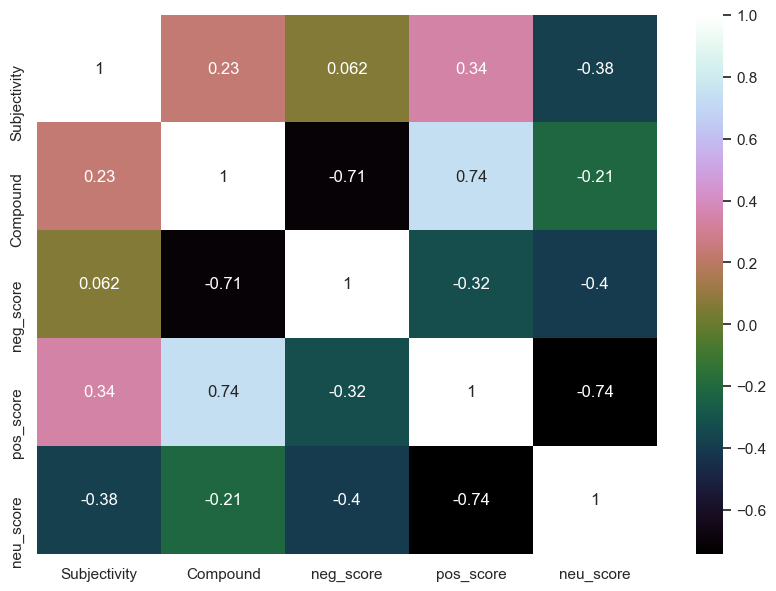

In [155]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

In [156]:
df.corr()

,Subjectivity,Compound,neg_score,pos_score,neu_score
Subjectivity,1.000000,0.233755,0.061993,0.342418,-0.375491
Compound,0.233755,1.000000,-0.713335,0.740878,-0.212714
neg_score,0.061993,-0.713335,1.000000,-0.321067,-0.397334
pos_score,0.342418,0.740878,-0.321067,1.000000,-0.741516
neu_score,-0.375491,-0.212714,-0.397334,-0.741516,1.000000


# <font color='green'>Visualization</font>

## Compound score 

<AxesSubplot:xlabel='comp_score', ylabel='count'>

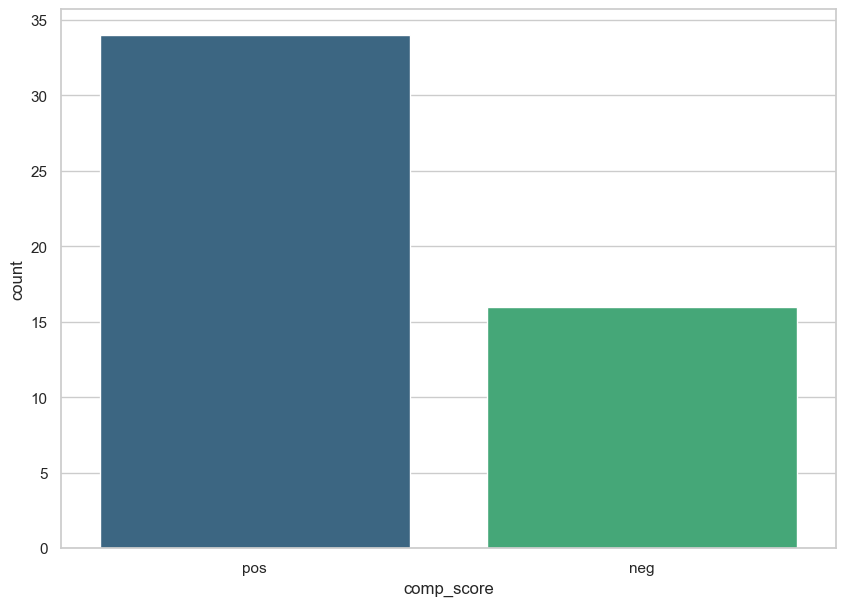

In [157]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='comp_score',data=df,palette='viridis')

## Compound value

<AxesSubplot:xlabel='Compound', ylabel='count'>

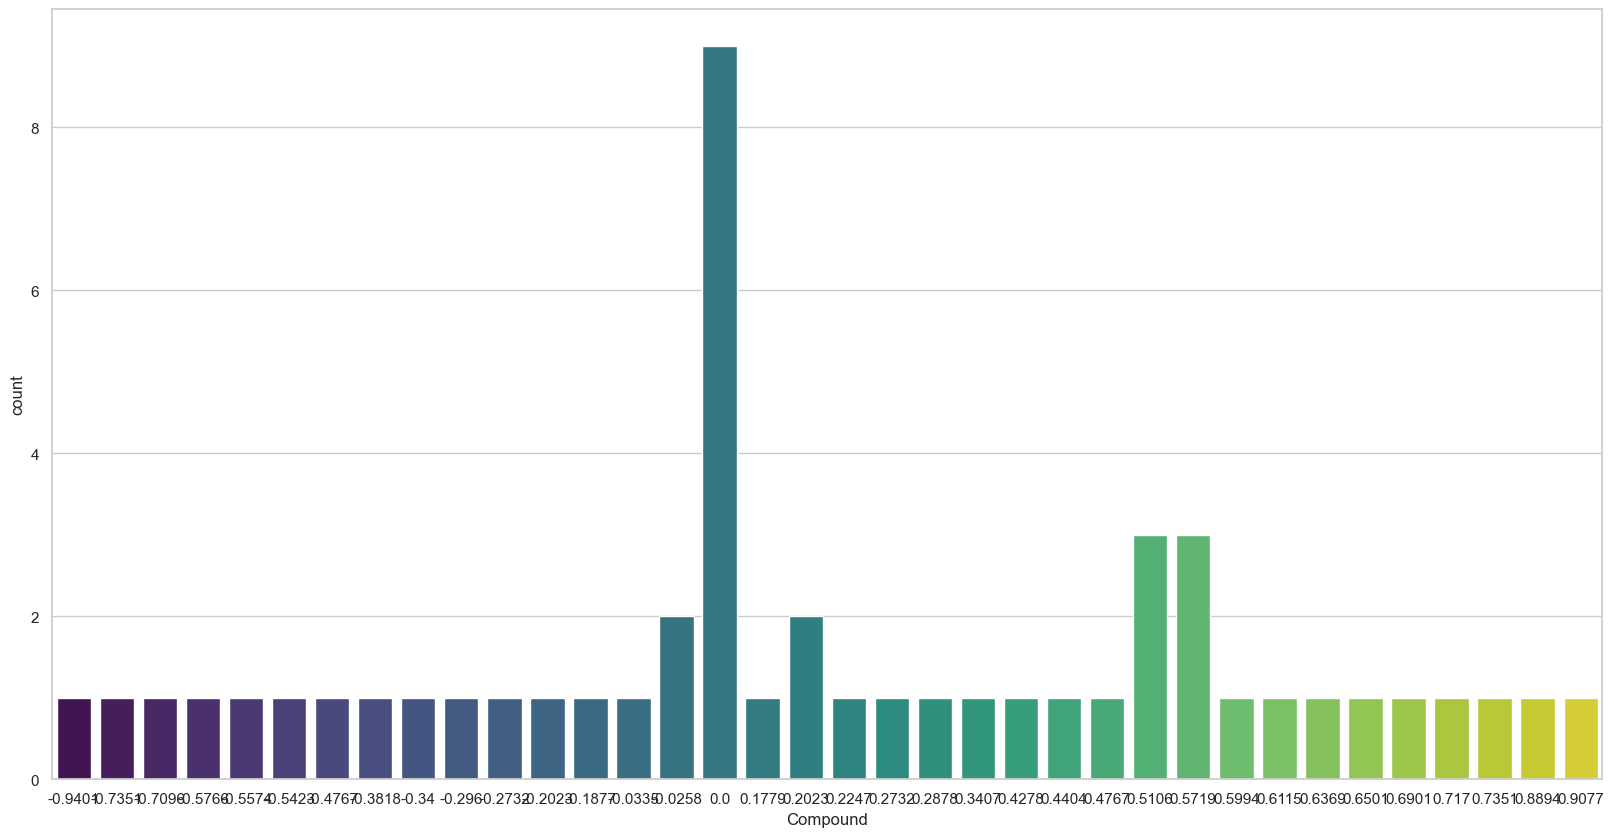

In [158]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('whitegrid')
sns.countplot(x='Compound',data=df,palette='viridis')

## Negative score

<AxesSubplot:xlabel='neg_score', ylabel='count'>

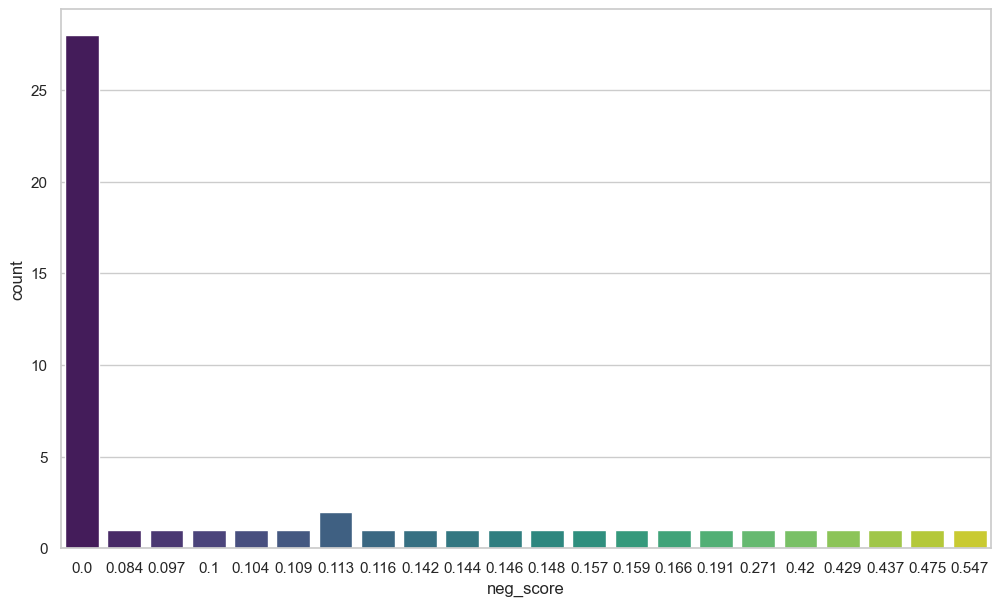

In [159]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('whitegrid')
sns.countplot(x='neg_score',data=df,palette='viridis')

## Positive score

<AxesSubplot:xlabel='pos_score', ylabel='count'>

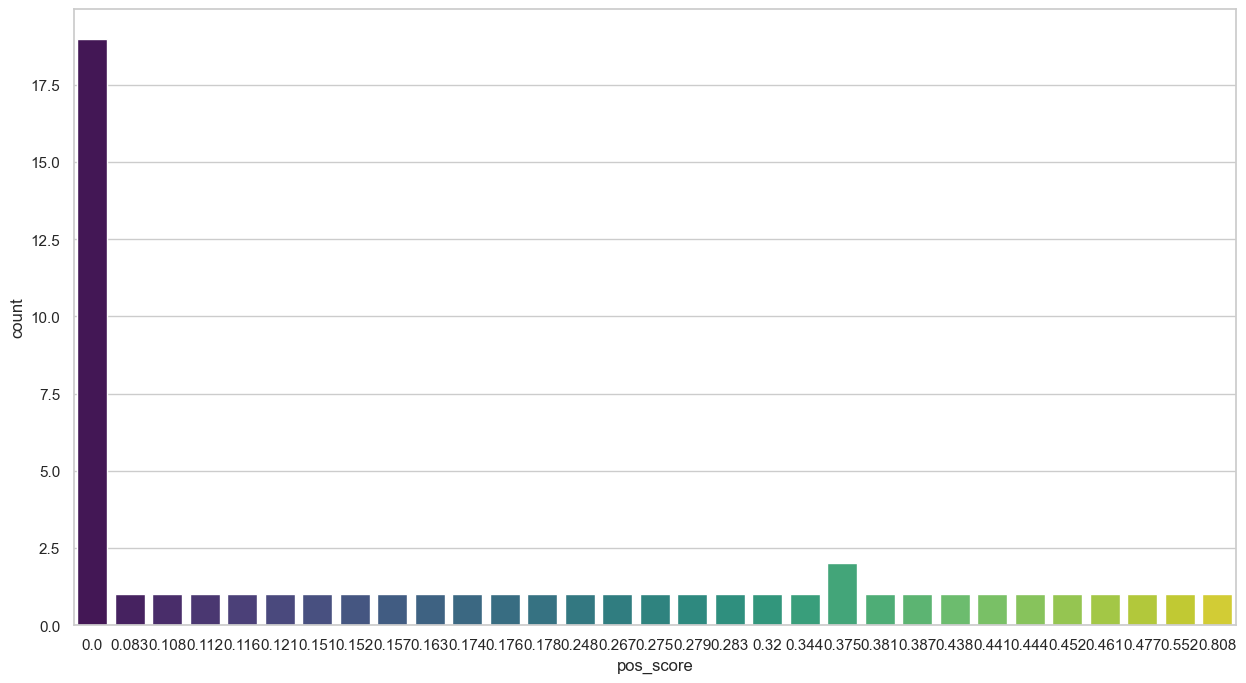

In [160]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
sns.countplot(x='pos_score',data=df,palette='viridis')

## Neutral score

<AxesSubplot:xlabel='neu_score', ylabel='count'>

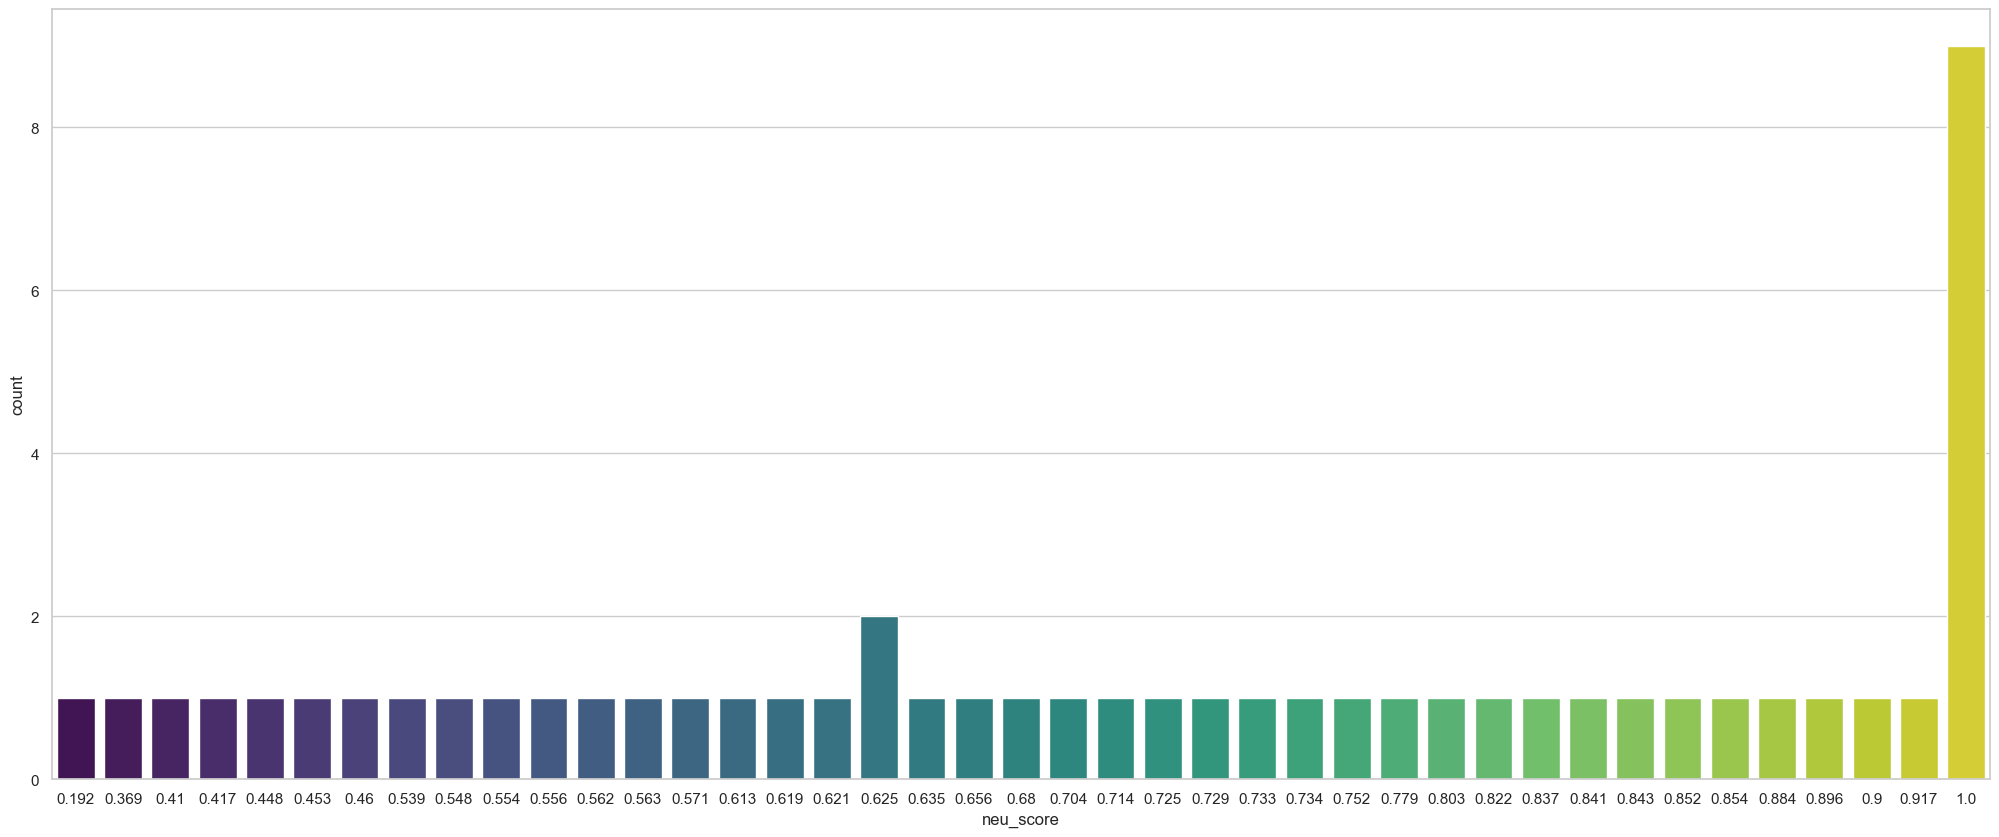

In [161]:
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style('whitegrid')
sns.countplot(x='neu_score',data=df,palette='viridis')

## Subjectivity score 

<AxesSubplot:xlabel='Subjectivity', ylabel='count'>

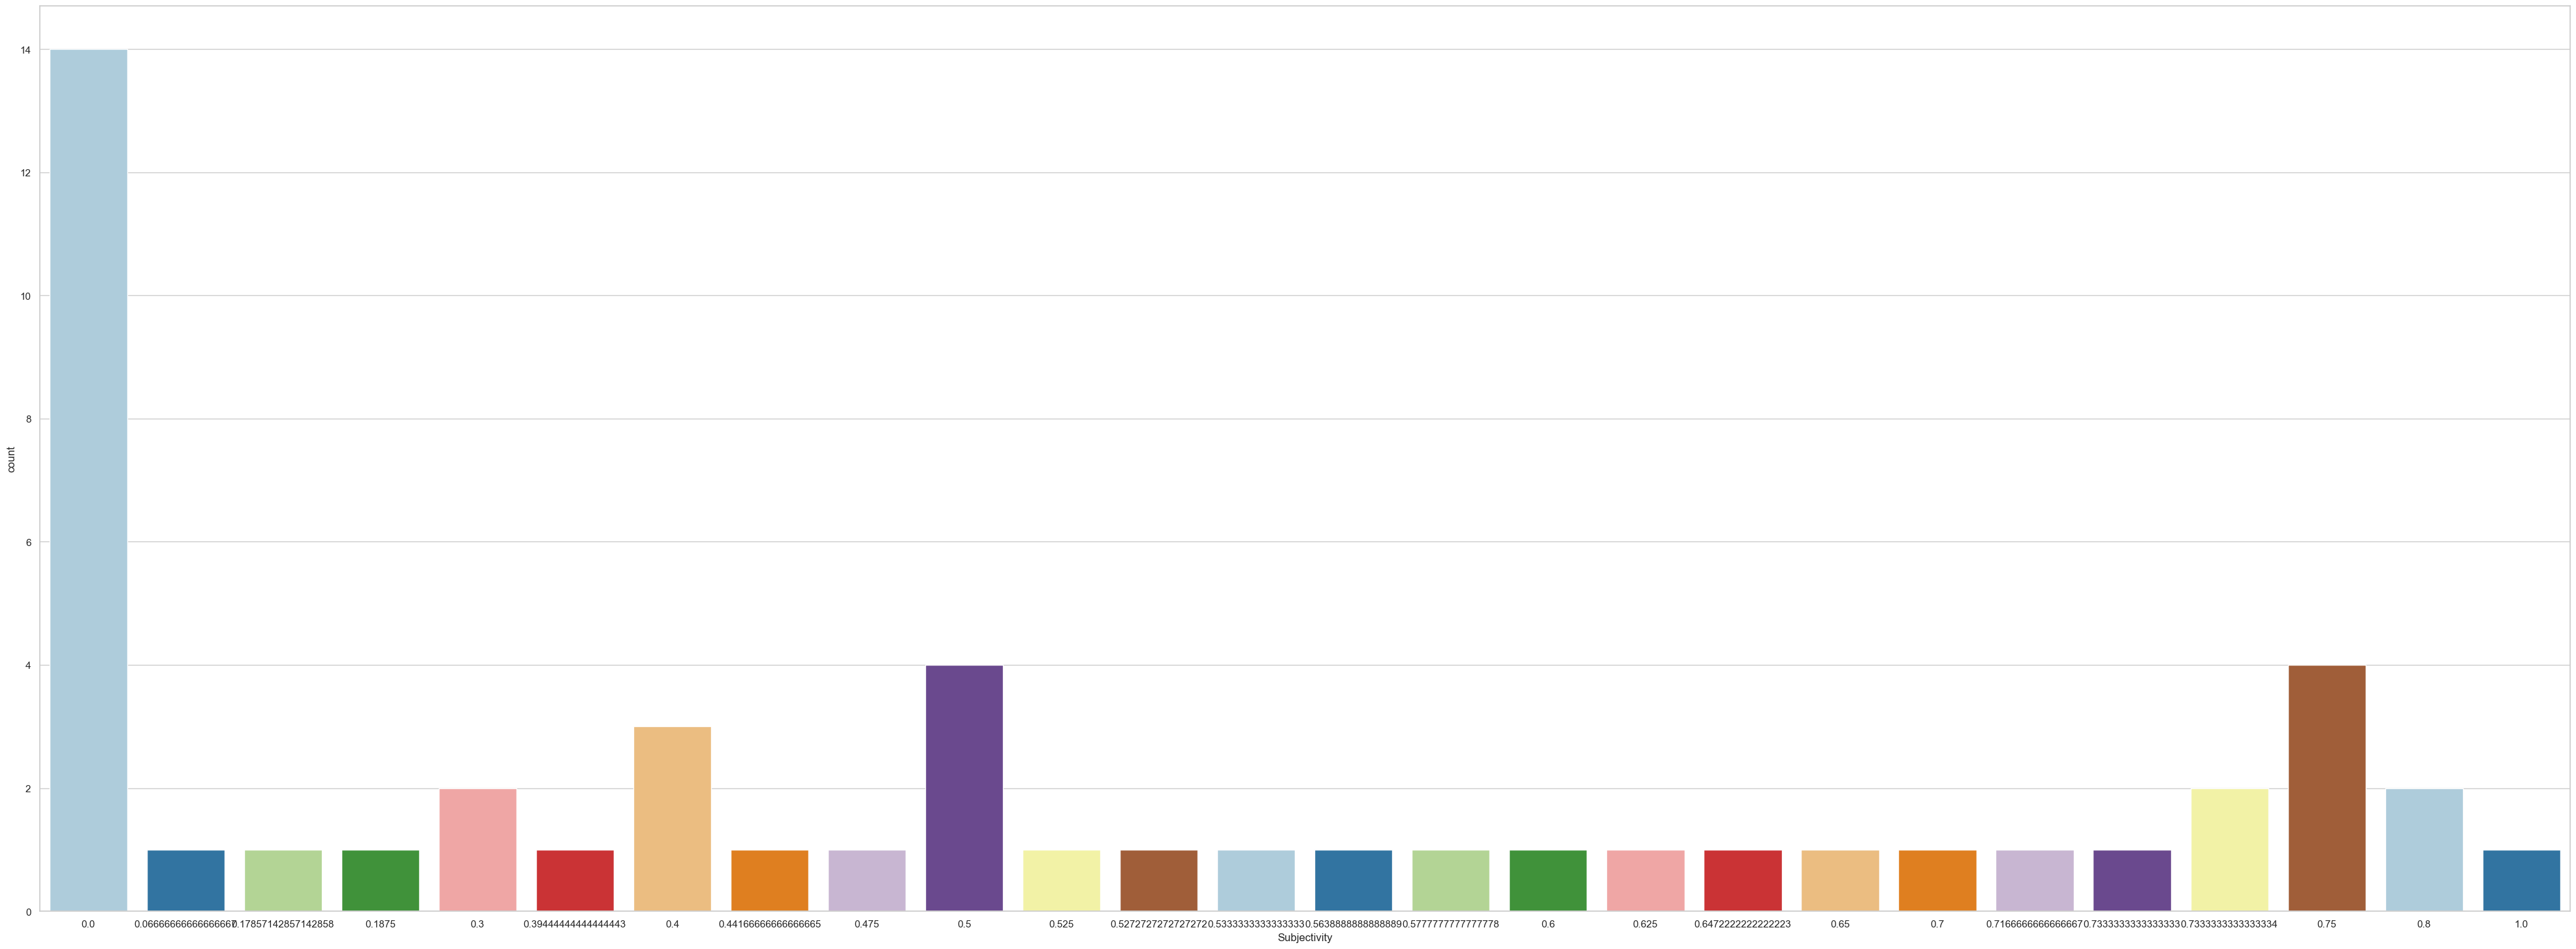

In [162]:
sns.set(rc={'figure.figsize':(50,18)})
sns.set_style('whitegrid')
sns.countplot(x='Subjectivity',data=df,palette='Paired')

## Negative score and Compound score

<AxesSubplot:xlabel='neg_score', ylabel='count'>

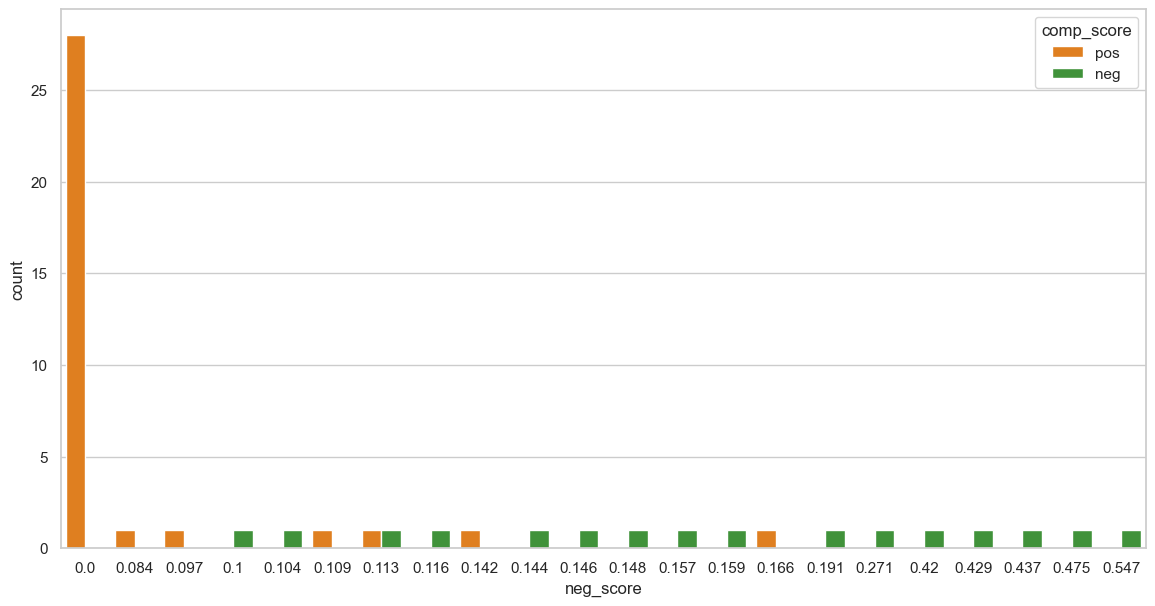

In [163]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.countplot(x='neg_score',hue='comp_score',data=df,palette='Paired_r')

## Positive score and Compound score

<AxesSubplot:xlabel='pos_score', ylabel='count'>

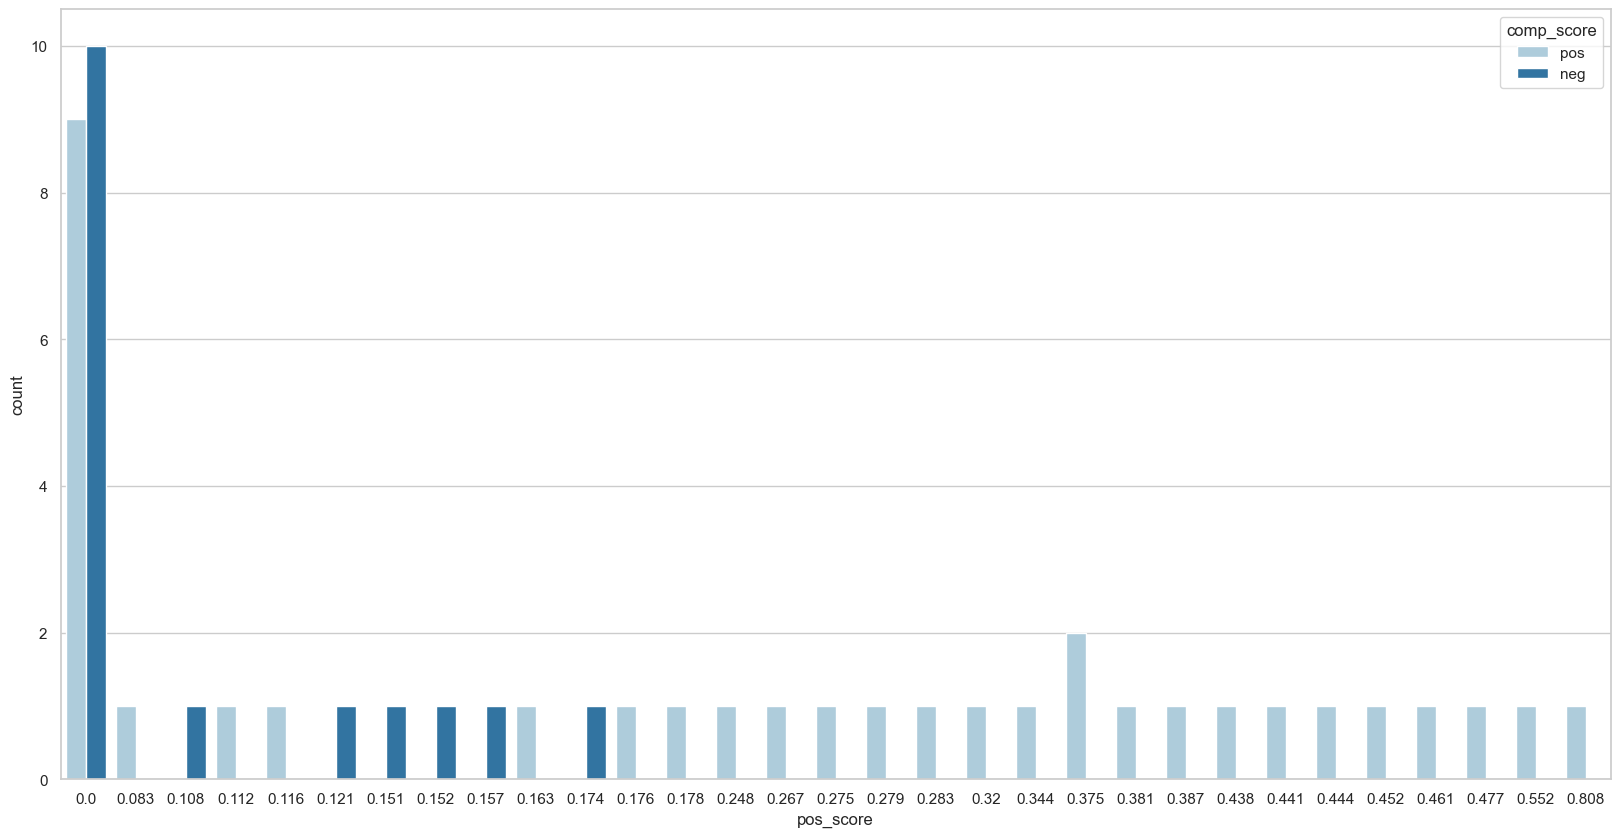

In [164]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('whitegrid')
sns.countplot(x='pos_score',hue='comp_score',data=df,palette='Paired')

## Neutral score and Compound score

<AxesSubplot:xlabel='neu_score', ylabel='count'>

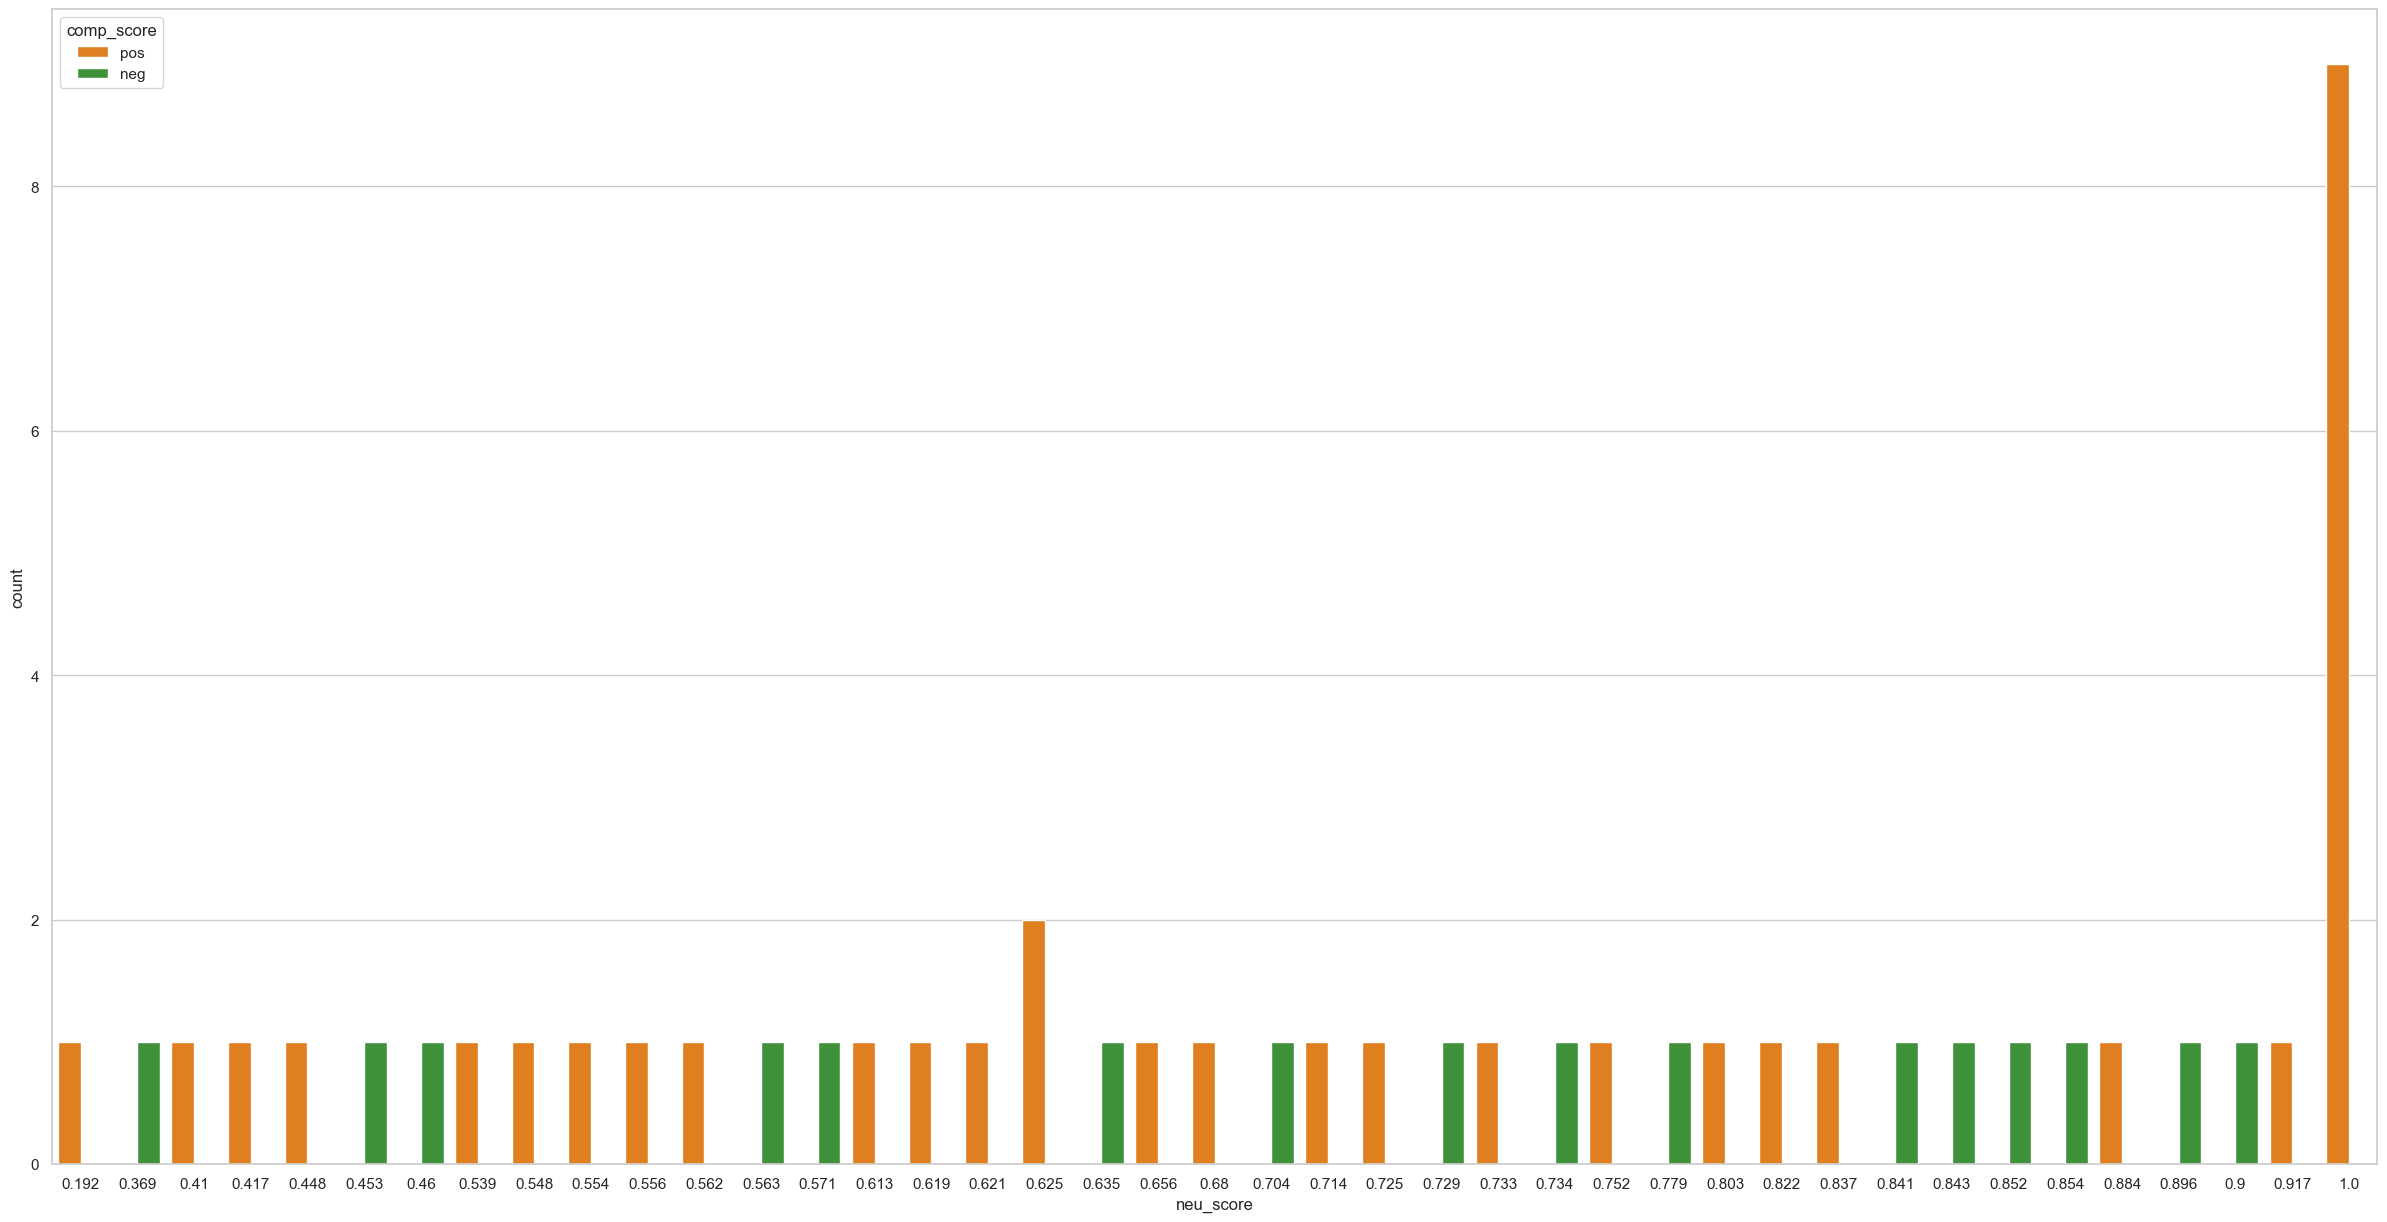

In [165]:
sns.set(rc={'figure.figsize':(30,15)})
sns.set_style('whitegrid')
sns.countplot(x='neu_score',hue='comp_score',data=df,palette='Paired_r')

## Subjectivity score and Compound score

<AxesSubplot:xlabel='Subjectivity', ylabel='count'>

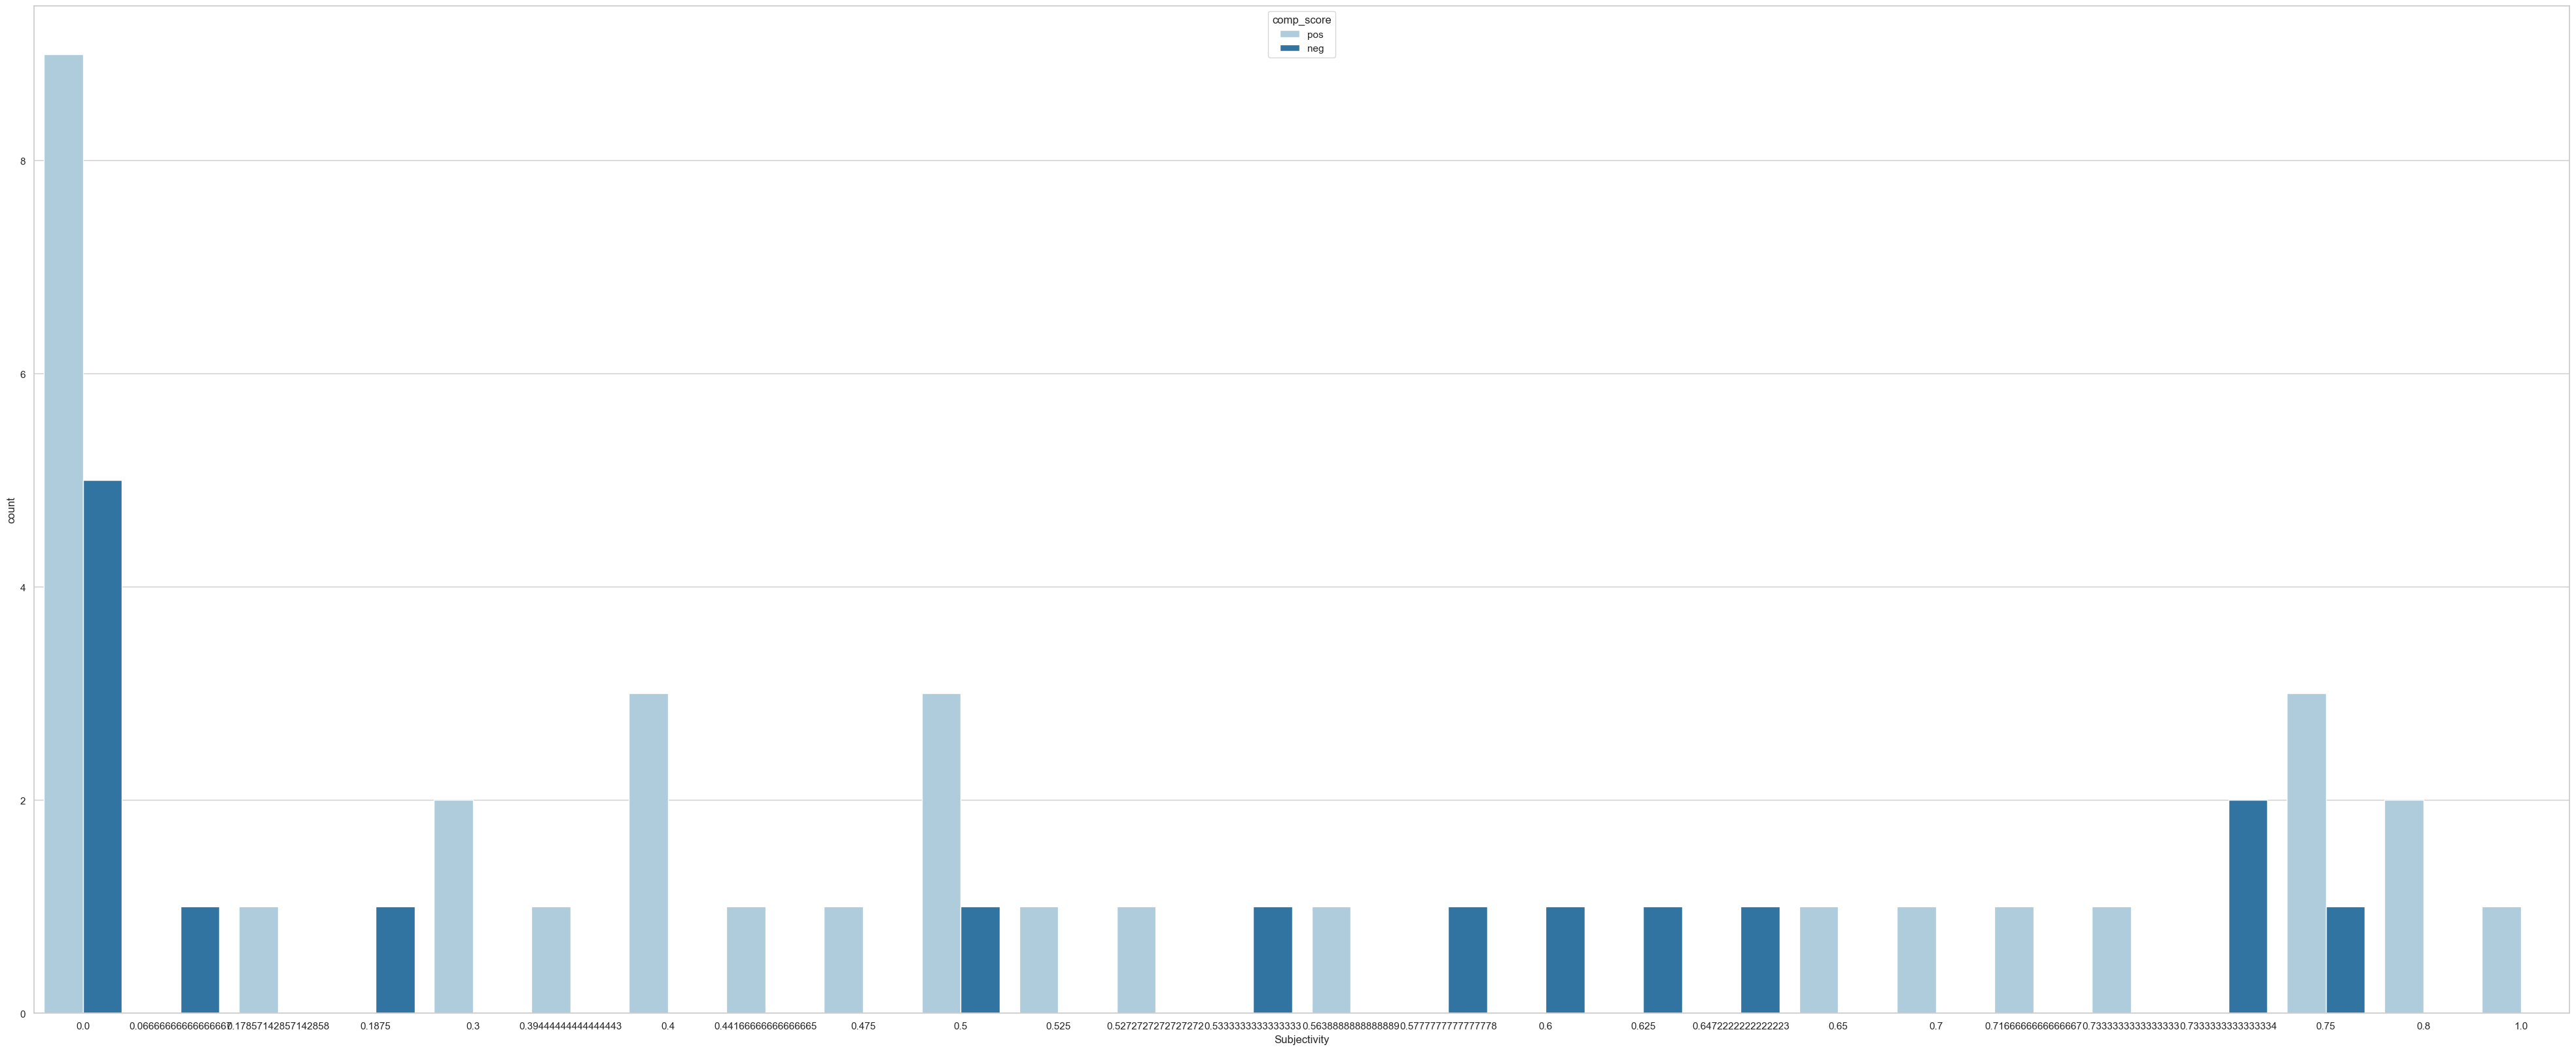

In [166]:
sns.set(rc={'figure.figsize':(50,20)})
sns.set_style('whitegrid')
sns.countplot(x='Subjectivity',hue='comp_score',data=df,palette='Paired')

## Positive score and Negative score

<AxesSubplot:xlabel='pos_score', ylabel='neg_score'>

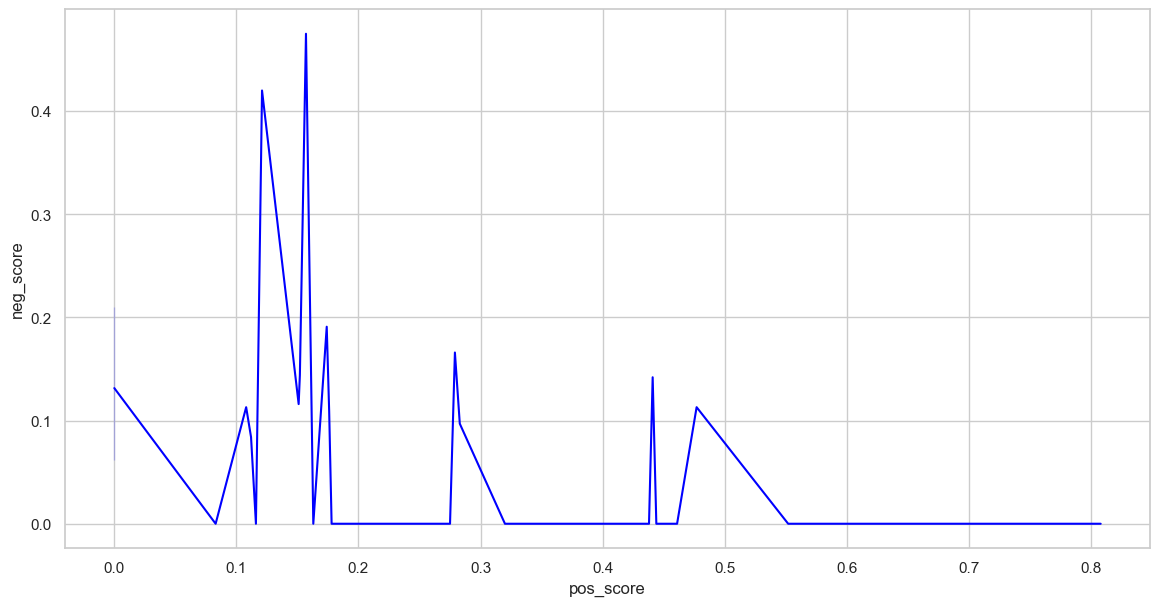

In [167]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.lineplot( x='pos_score',
            y='neg_score',
            data=df,color='blue')

In [168]:
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score,neu_score
0,Life’s simple. You make choices and you don’t ...,Life’s simple. You make choices and you don’t ...,0.178571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
1,Life is Beautiful outside the Matrix.\n\nhttps...,Life is Beautiful outside the Matrix.\n\n,0.525000,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,pos,0.000,0.438,0.562
2,Brotherhood is our most precious possession. h...,Brotherhood is our most precious possession.,0.750000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6115,pos,0.000,0.444,0.556
3,"As soon as you are granted life,\n\nYou are gu...","As soon as you are granted life,\n\nYou are gu...",0.000000,"{'neg': 0.144, 'neu': 0.704, 'pos': 0.152, 'co...",-0.2023,neg,0.144,0.152,0.704
4,Rules are for the Poor. https://t.co/Ln50iVJL7Z,Rules are for the Poor.,0.600000,"{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...",-0.4767,neg,0.437,0.000,0.563


# Machine Learning

In [169]:
X = df['Tweet']
y = df['comp_score']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

# CountVectorizer

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<35x230 sparse matrix of type '<class 'numpy.int64'>'
	with 373 stored elements in Compressed Sparse Row format>

# (Documents,Features)

In [173]:
X_train_counts.shape

(35, 230)

In [174]:
count_vect.get_feature_names()

['about',
 'act',
 'activities',
 'activity',
 'aft',
 'air',
 'also',
 'always',
 'am',
 'amazed',
 'an',
 'and',
 'andrew',
 'anything',
 'are',
 'as',
 'at',
 'average',
 'ban',
 'be',
 'beautiful',
 'because',
 'been',
 'best',
 'between',
 'bold',
 'bond',
 'breathe',
 'brotherhood',
 'bugatti',
 'built',
 'but',
 'by',
 'called',
 'can',
 'captain',
 'careful',
 'changed',
 'colour',
 'conquer',
 'control',
 'cou',
 'coward',
 'da',
 'daily',
 'day',
 'death',
 'depres',
 'depressed',
 'devil',
 'do',
 'don',
 'drive',
 'duty',
 'easy',
 'else',
 'empires',
 'equal',
 'every',
 'everyone',
 'facebook',
 'fight',
 'follow',
 'for',
 'free',
 'from',
 'fuck',
 'future',
 'genuinely',
 'gives',
 'giving',
 'god',
 'going',
 'granted',
 'great',
 'groups',
 'gt',
 'guaranteed',
 'hard',
 'has',
 'have',
 'he',
 'his',
 'hold',
 'homage',
 'honing',
 'hoping',
 'how',
 'humble',
 'idea',
 'if',
 'impossible',
 'improving',
 'in',
 'instead',
 'is',
 'it',
 'james',
 'judge',
 'just',


# Transform Counts to Frequencies with Tf-IDF

In [175]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(35, 230)

# Tf-IDF Vectorizer

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(35, 230)

# Training a Classifier

In [177]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

# Pipeline

In [178]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tdidf',TfidfVectorizer()),('clf',LinearSVC()),])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tdidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Results

In [179]:
predictions = text_clf.predict(X_test)

In [180]:
from sklearn import metrics

In [181]:
print(metrics.confusion_matrix(y_test,predictions))

[[0 6]
 [0 9]]


# Accuracy <font color='red'>75%</font>

In [182]:
metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.7499999999999999

In [183]:
print(metrics.classification_report(y_test,predictions,zero_division=1))

              precision    recall  f1-score   support

         neg       1.00      0.00      0.00         6
         pos       0.60      1.00      0.75         9

    accuracy                           0.60        15
   macro avg       0.80      0.50      0.37        15
weighted avg       0.76      0.60      0.45        15

